In [16]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization

In [17]:
#generator
train_ds=keras.utils.image_dataset_from_directory(
    directory = 'C:/Users/nm_ma/Desktop/dataset/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 64,
    image_size = (64, 64),
    )

validation_ds=keras.utils.image_dataset_from_directory(
    directory = 'C:/Users/nm_ma/Desktop/dataset/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 64,
    image_size = (64, 64),
    )

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [18]:
#Normalization
def process(image , label):
    image = tf.cast(image/255. , tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [25]:
model = Sequential()

model.add(Conv2D(64,kernel_size=(3,3),padding= 'valid' ,activation='relu',input_shape=(64,64,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(32,kernel_size=(3,3),padding= 'valid' ,activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))


model.add(Flatten())

model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))


In [26]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 62, 62, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 62, 62, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 31, 31, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 29, 29, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 29, 29, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │       401,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 422,177 (1.61 MB)

 Trainable params: 421,985 (1.61 MB)

 Non-trainable params: 192 (768.00 B)

In [27]:
model.compile(optimizer= 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [28]:
history = model.fit(train_ds,epochs=5, validation_data=validation_ds)

Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 138s 427ms/step - accuracy: 0.6497 - loss: 0.6917 - val_accuracy: 0.5898 - val_loss: 1.3042
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 83s 265ms/step - accuracy: 0.7693 - loss: 0.4728 - val_accuracy: 0.7082 - val_loss: 0.5926
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 119s 380ms/step - accuracy: 0.8141 - loss: 0.3990 - val_accuracy: 0.6398 - val_loss: 1.0015
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 95s 303ms/step - accuracy: 0.8578 - loss: 0.3230 - val_accuracy: 0.6812 - val_loss: 0.6637
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 84s 268ms/step - accuracy: 0.8920 - loss: 0.2565 - val_accuracy: 0.7560 - val_loss: 0.6550


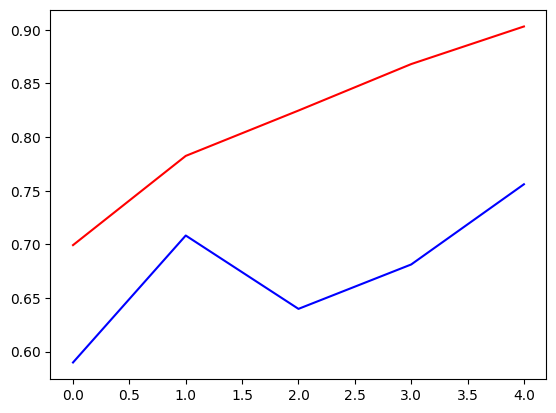

In [30]:
plt.plot(history.history['accuracy'],color='r', label='accuracy')
plt.plot(history.history['val_accuracy'],color='b', label='val_accuracy')

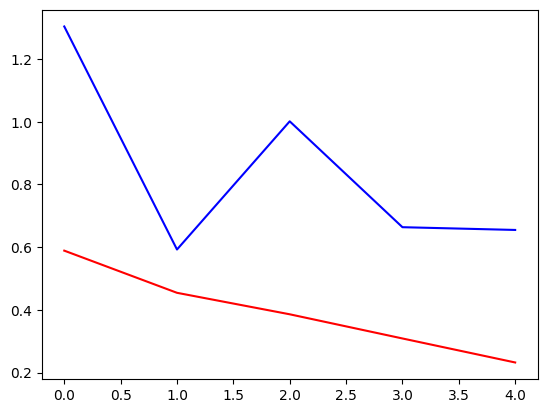

In [31]:
plt.plot(history.history['loss'],color='r', label='loss')
plt.plot(history.history['val_loss'],color='b', label='val_loss')

In [94]:
model.save('model.keras')

# Testing the model

In [62]:
import cv2

In [87]:
img = cv2.imread('dog.jpeg')

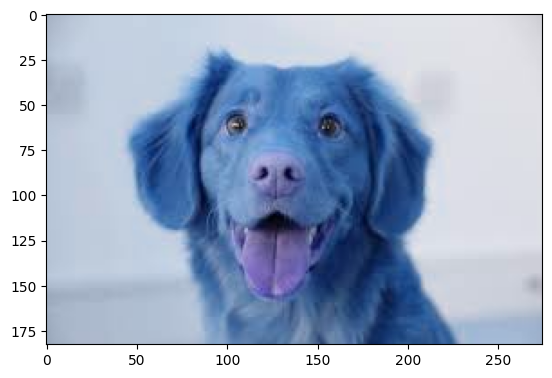

In [88]:
plt.imshow(img)

In [89]:
img.shape

(183, 275, 3)

In [90]:
img = cv2.resize(img,(64,64))

In [91]:
img = np.reshape(img,[1,64,64,3])

In [92]:
model.predict(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


array([[0.]], dtype=float32)

In [95]:
import cv2

In [96]:
image = cv2.imread('dog.jpeg')

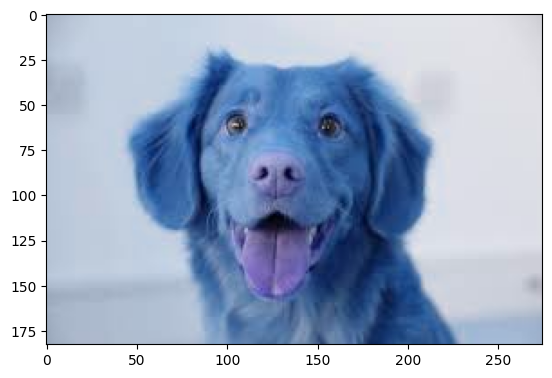

In [97]:
plt.imshow(image)

In [98]:
image = cv2.resize(image,(64,64))